# 1. Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from get_data import init_column_map, pull, pull_data_rowwise
import numpy as np

from segmentation import (
    filter_data,
    prepare_segmented_data,
    plot_grouped_bar,
    plot_stacked_bar,
    plot_facet_grid,
    plot_side_by_side_heatmaps,
    plot_stacked_percentage_bar,
    plot_multi_column_counts,
    plot_vehicle_presence_heatmaps,
    plot_vehicle_presence_percentage_heatmaps,
    plot_vehicle_presence_percentage_side_by_side,
    plot_likert_heatmap,
    plot_grouped_bar_chart,
    plot_co_occurrence_heatmap,
    plot_horizontal_stacked_bar_chart
)

In [2]:
# Define all variable categories
from variables import (
    demographics, 
    input_variables_vehicle_ownership, 
    familiarity, 
    kms_driven, 
    renewables_at_home,
    parking, 
    q6a_cols, 
    energ_literacy, 
    renewables_at_home, 
    intent_to_purchase_vehicle,
    benefits_v2g, 
    concerns_v2g, 
    interest_in_services, 
    consider_using_NRMA_for,
    charging_control, 
    preference_on_batt_use, 
    expected_return,
    q6a_petrol, q6a_ev, 
    q6a_plughyb, 
    q6a_hybrid,
    feature_label_map
)

# 2. Setup

## 2.1. Dataframe setup

In [3]:
csv_file = './data/survey_pre_processed_data.csv'

In [4]:
init_column_map(csv_file)

In [5]:
for col in input_variables_vehicle_ownership:
    freq = pull(col, csv_file)  # returns a dictionary {answer_value: count}
    print(f"Frequency for {col} => {freq}")

for col in demographics:
    freq = pull(col, csv_file)
    print(f"Frequency for {col} => {freq}")

Frequency for Q1_1 => {'1': 874, '0': 484}
Frequency for Q1_2 => {'0': 590, '1': 768}
Frequency for Q1_3 => {'0': 1325, '1': 33}
Frequency for Q1_4 => {'0': 1247, '1': 111}
Frequency for Q1_99 => {'0': 1355, '1': 3}
Frequency for gender => {'Male': 859, 'Not Stated': 140, 'Female': 359}
Frequency for colour_plus => {'LILAC': 232, 'KHAKI': 275, 'PURPLE': 166, 'GREY': 353, 'ORANGE': 167, 'BROWN': 41, 'RED': 29, 'UNKNOWN': 8, 'YELLOW': 36, 'CYAN': 11, 'GREEN': 6}
Frequency for region => {'METROPOLITAN': 478, 'RURAL': 251, 'INTERSTATE': 221, 'REGIONAL': 403, 'UNKNOWN': 5}
Frequency for Q20 => {'2': 774, '3': 178, '4': 161, '5 or more': 57, '1': 188}
Frequency for Q21 => {'Freestanding house': 1025, 'Townhouse': 71, 'Apartment/unit': 179, 'Semidetached or terrace': 62, 'Other (please specify)': 21}
Frequency for Q22 => {'Own outright': 919, 'Own with mortgage': 306, 'Other (please specify)': 31, 'Rent': 102}
Frequency for AgeBand => {'Prefer not to say': 36, '65+': 682, '55-64 years': 299, 

In [6]:
target_variable = 'Q10_2'  # "I would be interested in installing V2G..."

In [7]:
# TBD -> Make function here
columns_of_interest = (
    familiarity +
    kms_driven + 
    renewables_at_home + 
    q6a_cols + 
    demographics + 
    input_variables_vehicle_ownership + 
    intent_to_purchase_vehicle +
    parking + 
    benefits_v2g + 
    concerns_v2g +
    energ_literacy +
#   charging_control +
    [target_variable]
    )

rows_data = pull_data_rowwise(columns_of_interest, csv_file)

In [8]:
# Create a pandas DataFrame:
df = pd.DataFrame(rows_data, columns=columns_of_interest)

# Because Q1_x are '0' or '1' strings, converting them to numeric for easier ops
for c in input_variables_vehicle_ownership:
    # convert '0'/'1' -> 0/1
    df[c] = df[c].astype(int)  

df

,Q9,Q2,Q8_1,Q8_2,Q8_99,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,...,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_99,Q7_1,Q7_2,Q7_3,Q10_2
0,Somewhat familiar,"Less than 10,000",1,0,0,3,5,5,,,...,1,0,0,0,0,0,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree
1,Very familiar,"Less than 10,000",1,1,0,5,5,5,5,5,...,0,0,0,0,0,1,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
2,Not at all familiar,"20,001-50,000",0,0,1,2,1,2,,,...,0,0,0,0,0,0,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree
3,Not at all familiar,"Less than 10,000",0,0,1,,,,,,...,0,0,0,0,0,0,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat disagree
4,Very familiar,"20,001-50,000",1,1,0,5,5,5,4,4,...,0,1,0,0,0,0,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Somewhat familiar,"10,000-20,000",1,1,0,,,,1,3,...,1,1,0,0,0,0,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree
1354,Somewhat familiar,"Less than 10,000",0,0,1,5,5,5,,,...,0,0,1,0,1,0,Strongly agree,Somewhat agree,Somewhat agree,Neither agree nor disagree
1355,Very familiar,"10,000-20,000",1,0,0,4,4,5,4,4,...,0,1,0,0,1,0,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree
1356,Very familiar,"10,000-20,000",0,0,1,,,,3,5,...,0,0,0,0,1,0,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree


## 2.2. Segmentation

In [9]:
'''

Here's the only thing different from previous notebook.
We'll consider a segmentation based on a question (or combination of)

e.g.:
segment_1_filters = ["Q1_2 == '1'", "(Q3_1 == '1') | (Q3_2 == '1')"]
or
filters = ["Q1_2 == '1'"]

'''

'\n\nHere\'s the only thing different from previous notebook.\nWe\'ll consider a segmentation based on a question (or combination of)\n\ne.g.:\nsegment_1_filters = ["Q1_2 == \'1\'", "(Q3_1 == \'1\') | (Q3_2 == \'1\')"]\nor\nfilters = ["Q1_2 == \'1\'"]\n\n'

In [10]:
# Change string to numeric
df[input_variables_vehicle_ownership] = df[input_variables_vehicle_ownership].apply(pd.to_numeric, errors='coerce')
df[intent_to_purchase_vehicle] = df[intent_to_purchase_vehicle].apply(pd.to_numeric, errors='coerce')
df[parking] = df[parking].apply(pd.to_numeric, errors='coerce')

In [11]:
ev_owners = ["Q1_2 == 1"]
df_ev_owners = filter_data(df, ev_owners)

In [12]:
df_ev_owners

,Q9,Q2,Q8_1,Q8_2,Q8_99,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,...,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_99,Q7_1,Q7_2,Q7_3,Q10_2
1,Very familiar,"Less than 10,000",1,1,0,5,5,5,5,5,...,0,0,0,0,0,1,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
4,Very familiar,"20,001-50,000",1,1,0,5,5,5,4,4,...,0,1,0,0,0,0,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree
5,Very familiar,"20,001-50,000",1,0,0,5,5,5,5,5,...,0,0,1,0,0,0,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
9,Very familiar,"20,001-50,000",0,0,1,3,5,5,3,5,...,0,0,1,0,0,0,Neither agree nor disagree,Somewhat agree,Somewhat agree,Strongly agree
10,Somewhat familiar,"10,000-20,000",1,0,0,2,2,5,1,3,...,1,1,0,0,0,0,Strongly agree,Strongly agree,Somewhat agree,Neither agree nor disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Very familiar,"10,000-20,000",1,0,0,,,,2,3,...,0,1,0,0,1,0,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
1353,Somewhat familiar,"10,000-20,000",1,1,0,,,,1,3,...,1,1,0,0,0,0,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree
1355,Very familiar,"10,000-20,000",1,0,0,4,4,5,4,4,...,0,1,0,0,1,0,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree
1356,Very familiar,"10,000-20,000",0,0,1,,,,3,5,...,0,0,0,0,1,0,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree


In [13]:
# NOT EV owners who want to buy EV in the next 5 years
buying_ev_5_years = ["(Q1_2 != 1) & (Q5_2 == 1)"]
df_buying_ev_5_years = filter_data(df, buying_ev_5_years)

In [14]:
df_buying_ev_5_years

,Q9,Q2,Q8_1,Q8_2,Q8_99,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,...,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_99,Q7_1,Q7_2,Q7_3,Q10_2
0,Somewhat familiar,"Less than 10,000",1,0,0,3,5,5,,,...,1,0,0,0,0,0,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree
14,Not at all familiar,"Less than 10,000",1,0,0,2,5,5,,,...,0,0,0,1,0,0,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Neither agree nor disagree
22,Very familiar,"20,001-50,000",1,0,0,5,5,5,,,...,0,0,1,0,1,0,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
29,Not at all familiar,"10,000-20,000",0,0,1,3,5,5,,,...,0,0,0,0,0,1,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
31,Somewhat familiar,"10,000-20,000",1,1,0,3,5,5,,,...,0,0,1,1,0,0,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Somewhat familiar,"20,001-50,000",1,1,0,2,5,5,,,...,0,0,0,0,0,1,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
1208,Not at all familiar,"20,001-50,000",0,0,1,4,3,5,,,...,1,0,1,0,0,0,Neither agree nor disagree,Somewhat disagree,Somewhat agree,Neither agree nor disagree
1231,Very familiar,"Less than 10,000",0,0,1,1,2,2,,,...,0,0,0,0,0,0,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1296,Somewhat familiar,"10,000-20,000",1,0,0,4,5,5,,,...,0,0,0,1,1,0,Somewhat agree,Strongly agree,Somewhat disagree,Neither agree nor disagree


In [15]:
no_ev_5_years = ["(Q1_2 != 1) & (Q5_2 != 1)"]
df_no_ev_5_years = filter_data(df, no_ev_5_years)

In [16]:
df_no_ev_5_years

,Q9,Q2,Q8_1,Q8_2,Q8_99,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,...,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_99,Q7_1,Q7_2,Q7_3,Q10_2
2,Not at all familiar,"20,001-50,000",0,0,1,2,1,2,,,...,0,0,0,0,0,0,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree
3,Not at all familiar,"Less than 10,000",0,0,1,,,,,,...,0,0,0,0,0,0,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat disagree
6,Not at all familiar,"10,000-20,000",0,0,1,5,5,5,,,...,0,0,0,0,0,1,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree
7,Somewhat familiar,"10,000-20,000",0,0,1,3,3,5,,,...,0,0,1,0,0,0,Strongly agree,Somewhat agree,Somewhat agree,Neither agree nor disagree
8,Not at all familiar,"Less than 10,000",1,0,0,3,5,5,,,...,0,0,0,0,0,0,Strongly agree,Somewhat agree,Neither agree nor disagree,Somewhat disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,Not at all familiar,"10,000-20,000",1,0,0,2,4,5,,,...,1,0,0,0,0,0,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree
1340,Not at all familiar,"20,001-50,000",0,0,1,5,5,5,,,...,1,0,0,0,0,0,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree
1342,Somewhat familiar,"20,001-50,000",0,0,1,2,4,5,,,...,0,0,0,1,1,0,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree
1348,Not at all familiar,"10,000-20,000",0,0,1,3,5,5,,,...,0,0,0,0,0,0,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat disagree


In [17]:
segments = [df_ev_owners, df_buying_ev_5_years, df_no_ev_5_years]
segment_names = ["EV Owners", "Buying EV in 5 Years", "No EV in 5 Years"]

In [18]:
# Concatenate with segment labels
df_combined = prepare_segmented_data(segments, segment_names)

c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Segment"] = name  # Add segment label
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Segment"] = name  # Add segment label
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:29: SettingWithCopyWarning: 
A 

# 2. Descriptive Analytics - Comparative per segment

## 2.1. Demographics:

### 2.1.1. Gender

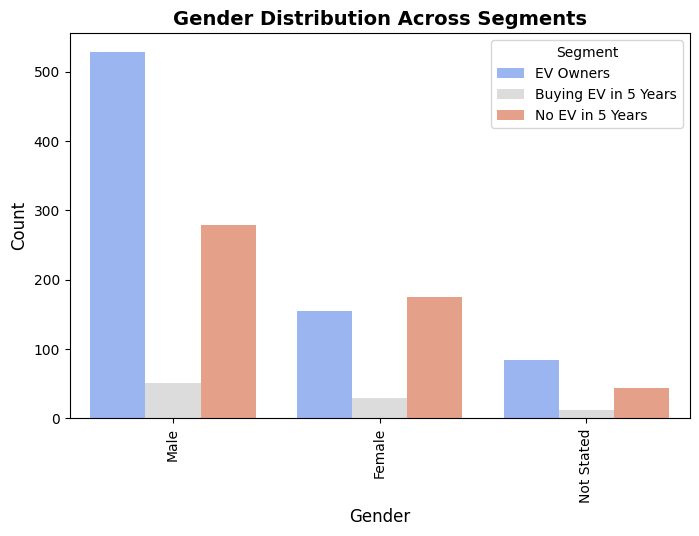

In [19]:
# Run Visualizations
plot_grouped_bar(df_combined, "gender", "Gender Distribution Across Segments", "Gender", "Count")

<Figure size 1000x600 with 0 Axes>

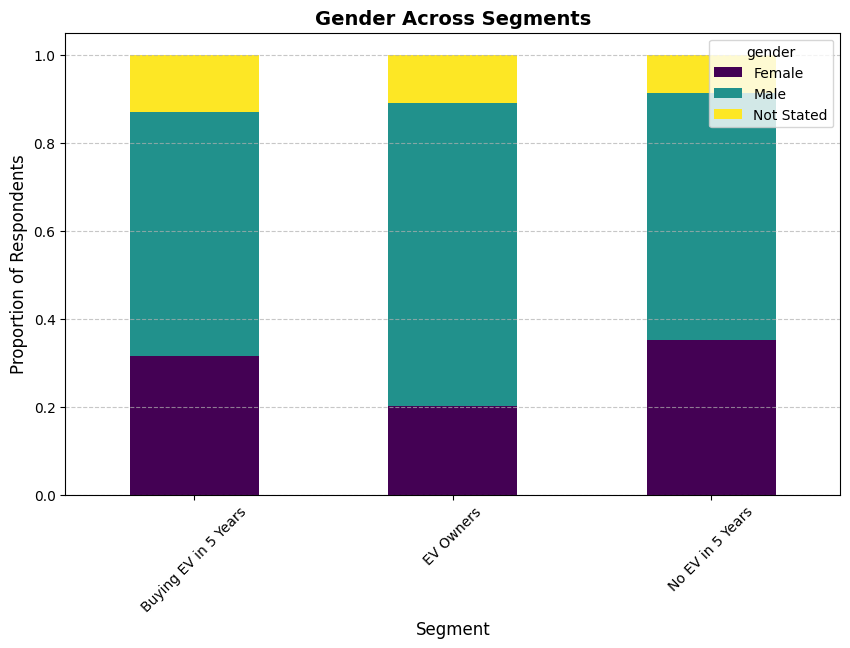

In [20]:
plot_stacked_percentage_bar(df_combined, 
                            "gender", 
                            "Segment", 
                            "Gender Across Segments", 
                            "Segment", 
                            "Proportion of Respondents")


### 2.1.2. Age

<Figure size 1000x600 with 0 Axes>

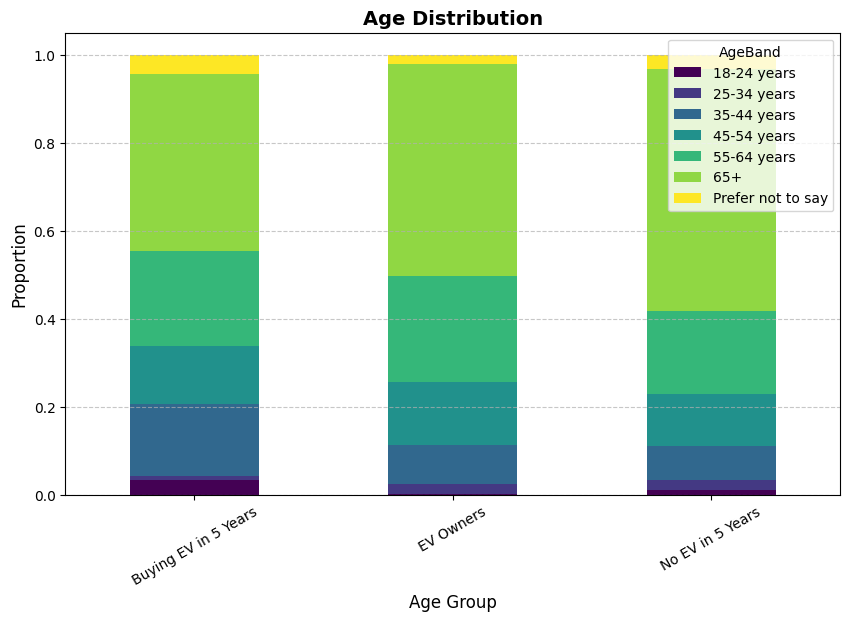

In [21]:
plot_stacked_bar(df_combined, "AgeBand", "Segment", "Age Distribution", "Age Group", "Proportion")

### 2.1.3. Location and age

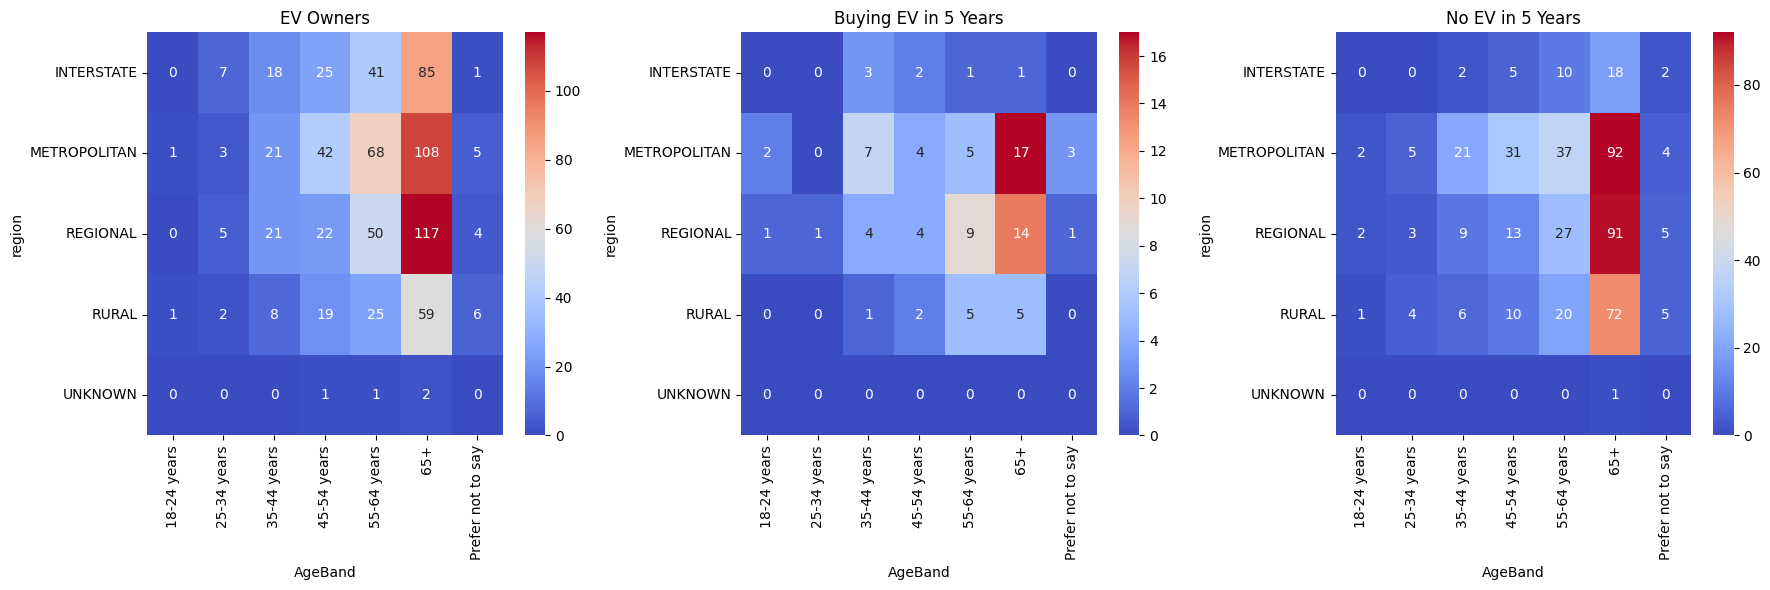

In [22]:
# Ensure uniform heatmap categories for all segments
plot_side_by_side_heatmaps(
    segments=[df_ev_owners, df_buying_ev_5_years, df_no_ev_5_years],
    titles=["EV Owners", "Buying EV in 5 Years", "No EV in 5 Years"],
    row_var="region",
    col_var="AgeBand"
)


### 2.1.3. Home ownership and age

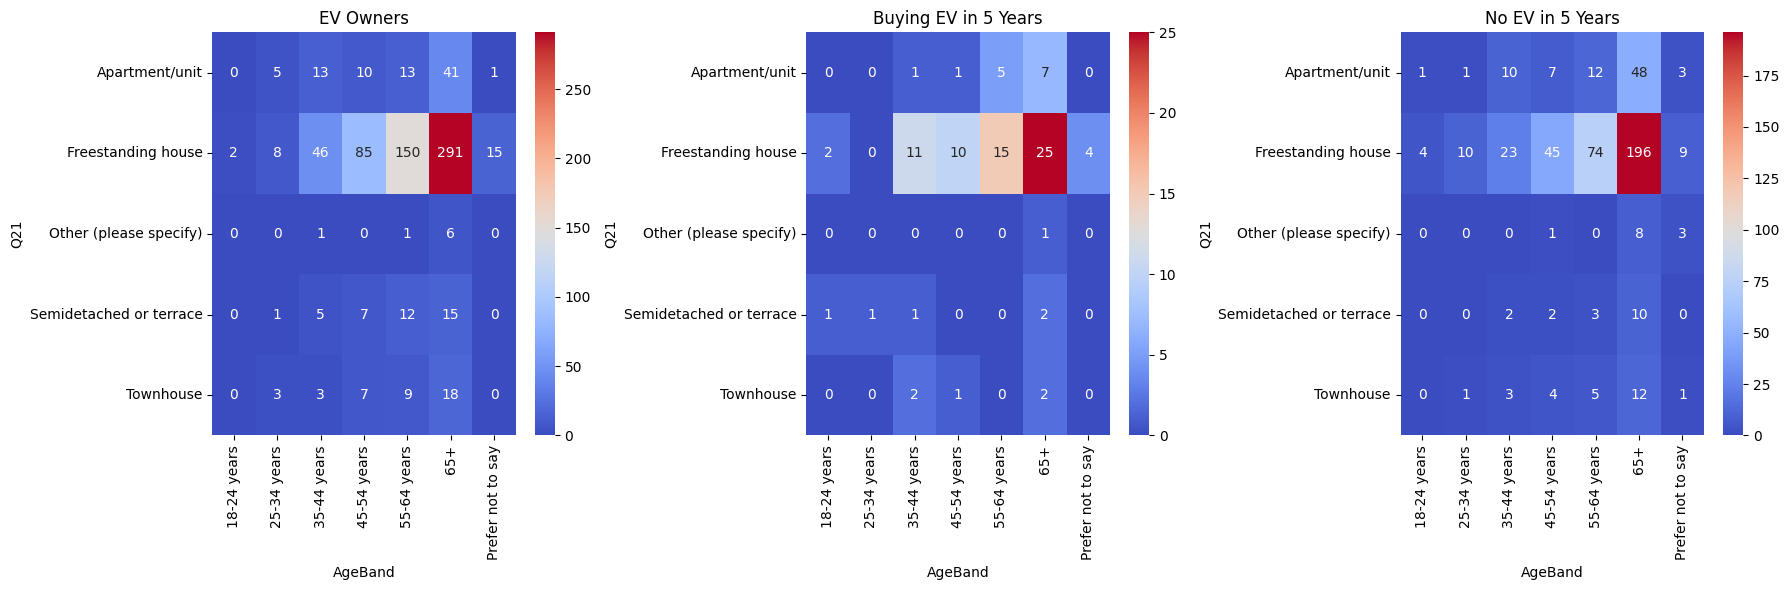

In [23]:
# Ensure uniform heatmap categories for all segments
plot_side_by_side_heatmaps(
    segments=[df_ev_owners, df_buying_ev_5_years, df_no_ev_5_years],
    titles=["EV Owners", "Buying EV in 5 Years", "No EV in 5 Years"],
    row_var="Q21",
    col_var="AgeBand"
)


## 2.2. Capability / Knowledge

<Figure size 1000x600 with 0 Axes>

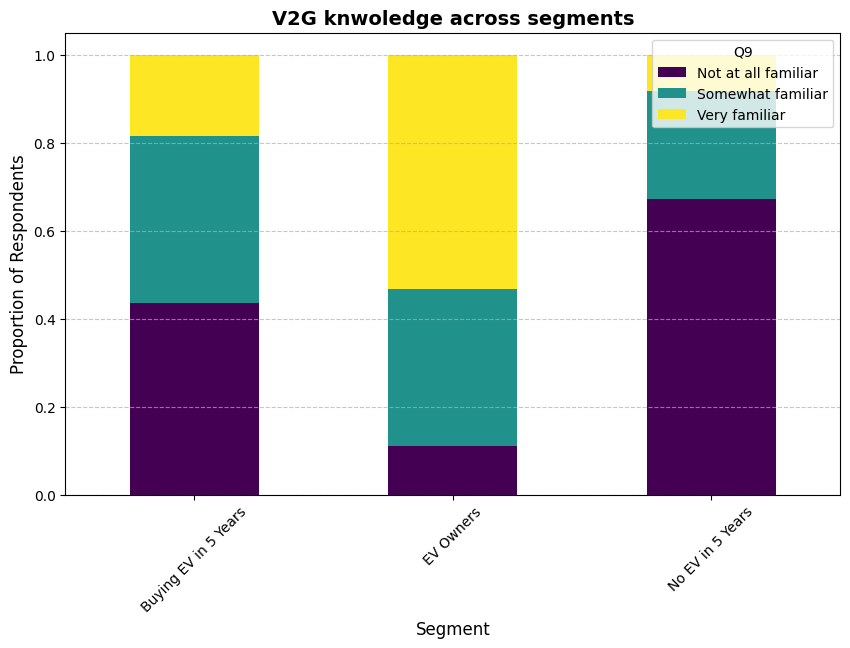

In [24]:
plot_stacked_percentage_bar(df_combined, 
                            "Q9", 
                            "Segment", 
                            "V2G knwoledge across segments", 
                            "Segment", 
                            "Proportion of Respondents")


## 2.3. Opportunity / Environment

### 2.3.1. Vehicle ownership

In [25]:
# Redundant for this one

### 2.3.2. Home ownership and type

<Figure size 1000x600 with 0 Axes>

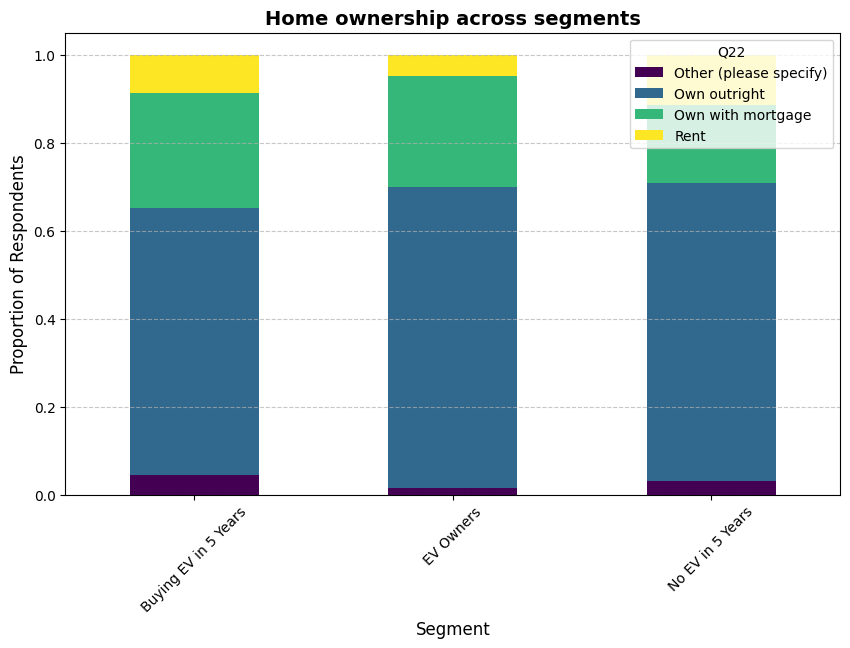

In [26]:
plot_stacked_percentage_bar(df_combined, 
                            "Q22", 
                            "Segment", 
                            "Home ownership across segments", 
                            "Segment", 
                            "Proportion of Respondents")


<Figure size 1000x600 with 0 Axes>

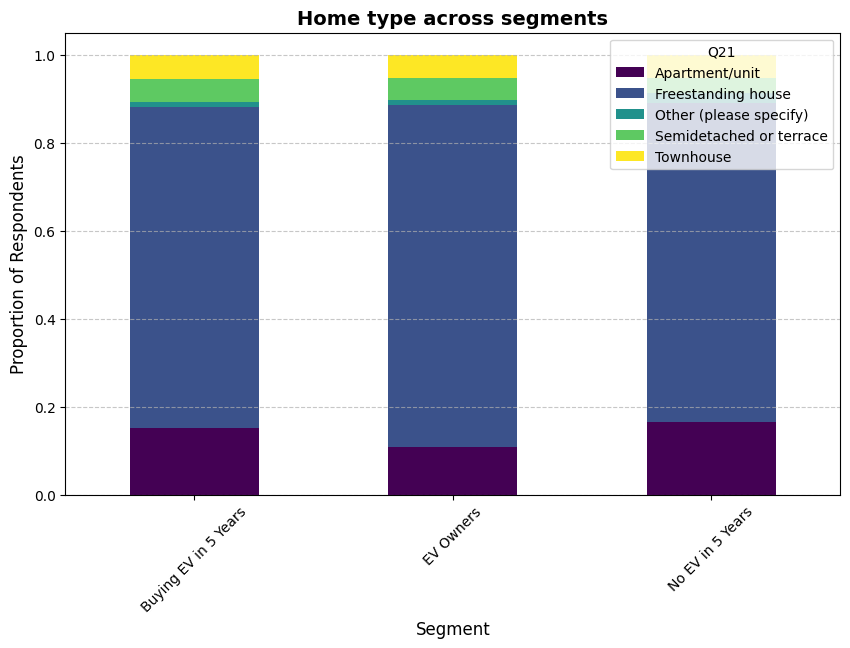

In [27]:
plot_stacked_percentage_bar(df_combined, 
                            "Q21", 
                            "Segment", 
                            "Home type across segments", 
                            "Segment", 
                            "Proportion of Respondents")


### 2.3.2. Parking access

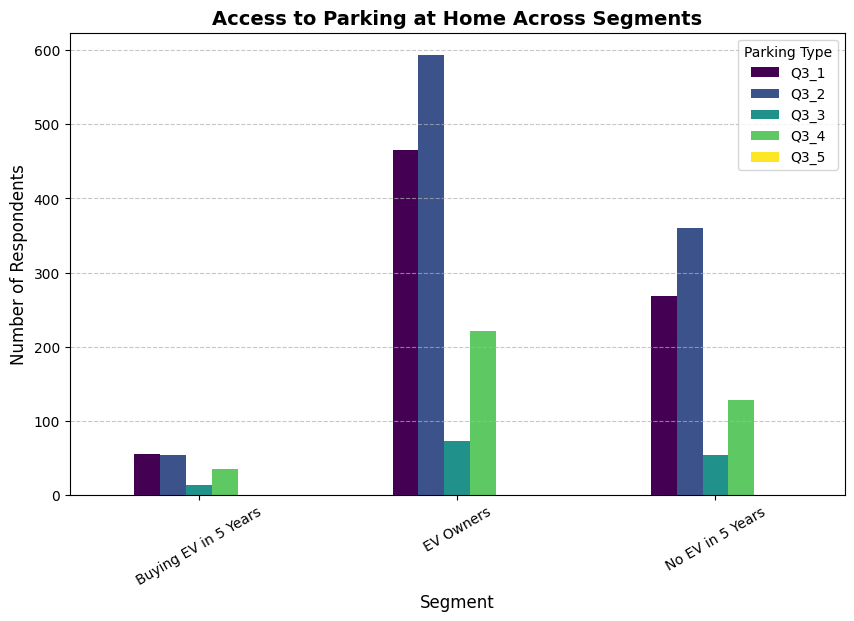

In [28]:
plot_multi_column_counts(
                        df_combined, 
                         parking, 
                         "Segment", 
                         "Access to Parking at Home Across Segments",
                         "Segment", 
                         "Number of Respondents", 
                         stacked=False
                         )


### 2.4.3. Time of day car parked at home

c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors=

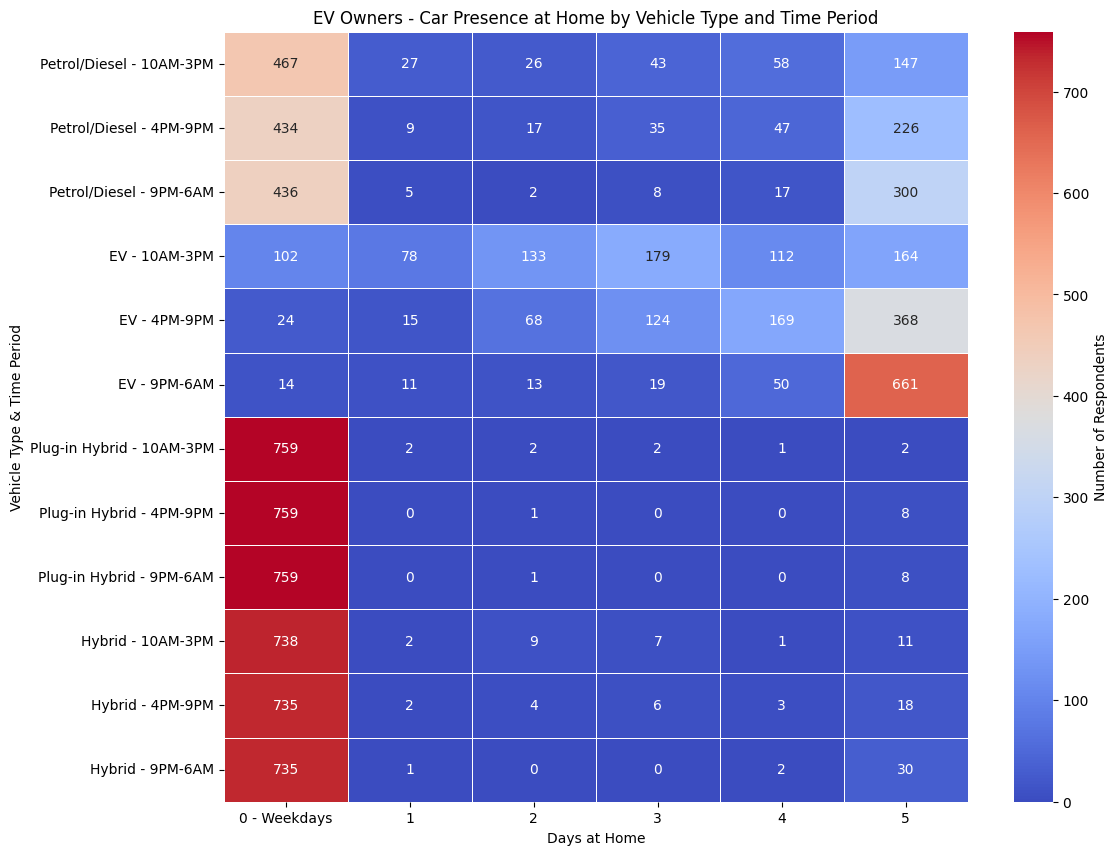

c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors=

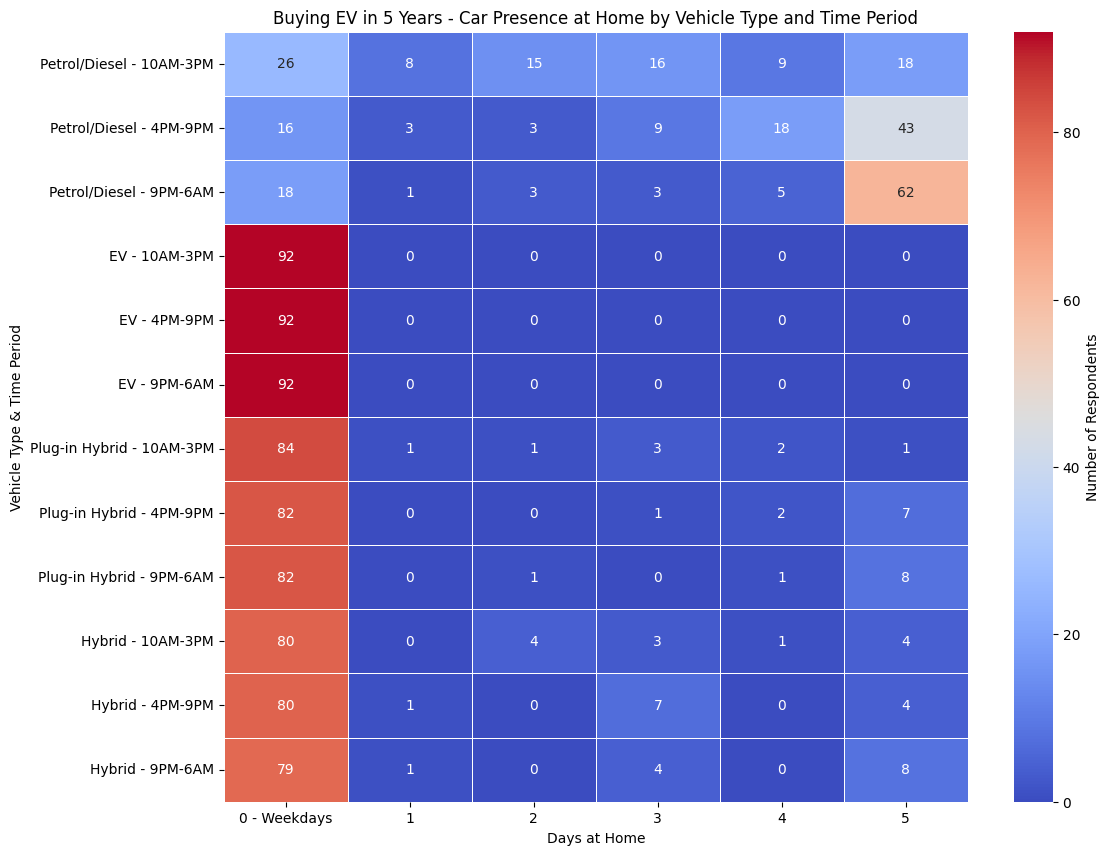

c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors=

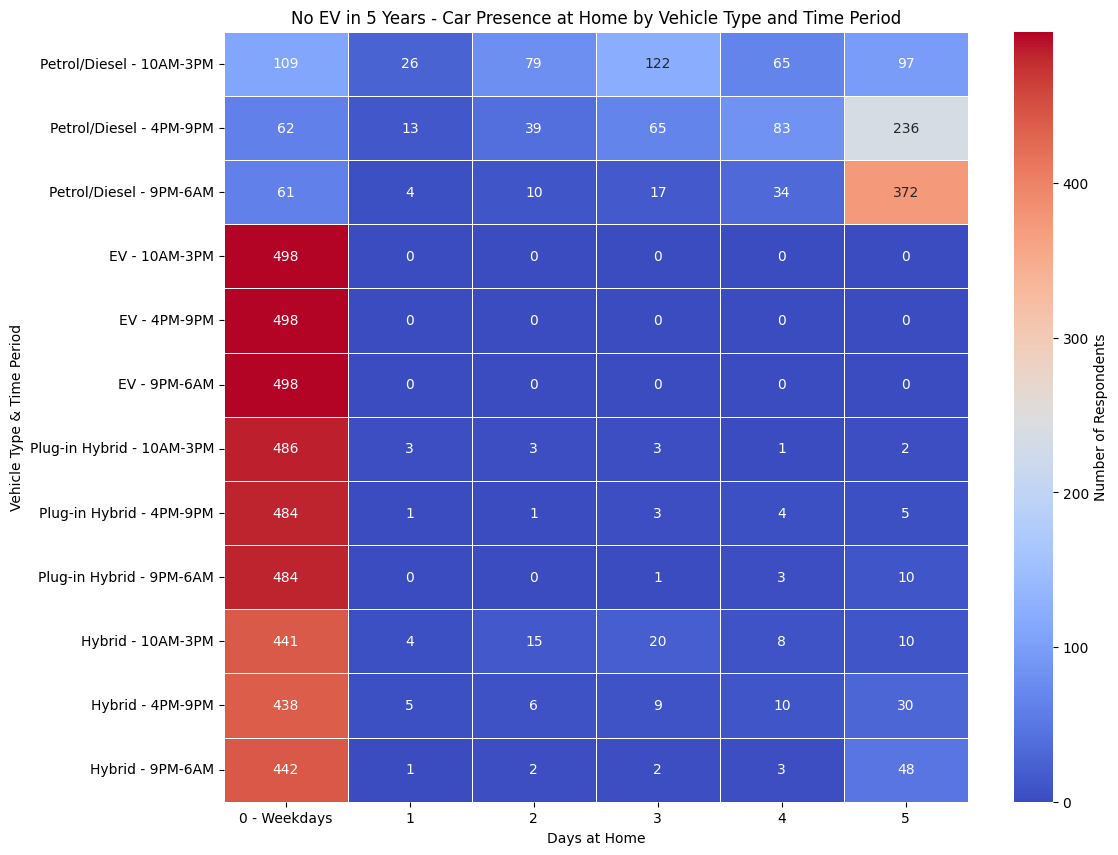

In [29]:
# Define vehicle type column mapping
vehicle_type_columns = {
    "Petrol/Diesel": q6a_petrol,
    "EV": q6a_ev,
    "Plug-in Hybrid": q6a_plughyb,
    "Hybrid": q6a_hybrid
}

# Define time period labels
time_periods = ["10AM-3PM", "4PM-9PM", "9PM-6AM"]

# Run for all segments
for df_segment, segment_name in zip([df_ev_owners, df_buying_ev_5_years, df_no_ev_5_years], 
                                    ["EV Owners", "Buying EV in 5 Years", "No EV in 5 Years"]):
    plot_vehicle_presence_heatmaps(df_segment, vehicle_type_columns, time_periods, "Segment", title_prefix=f"{segment_name} - ")


c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors=

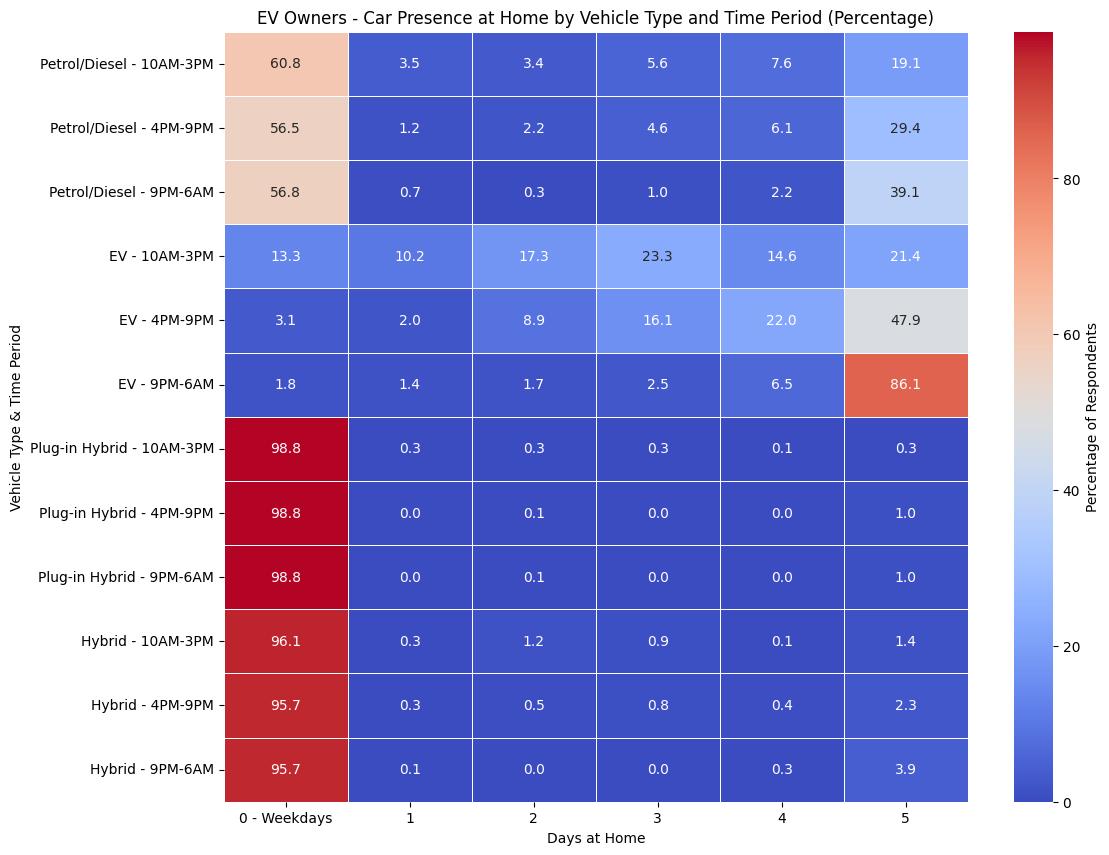

c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors=

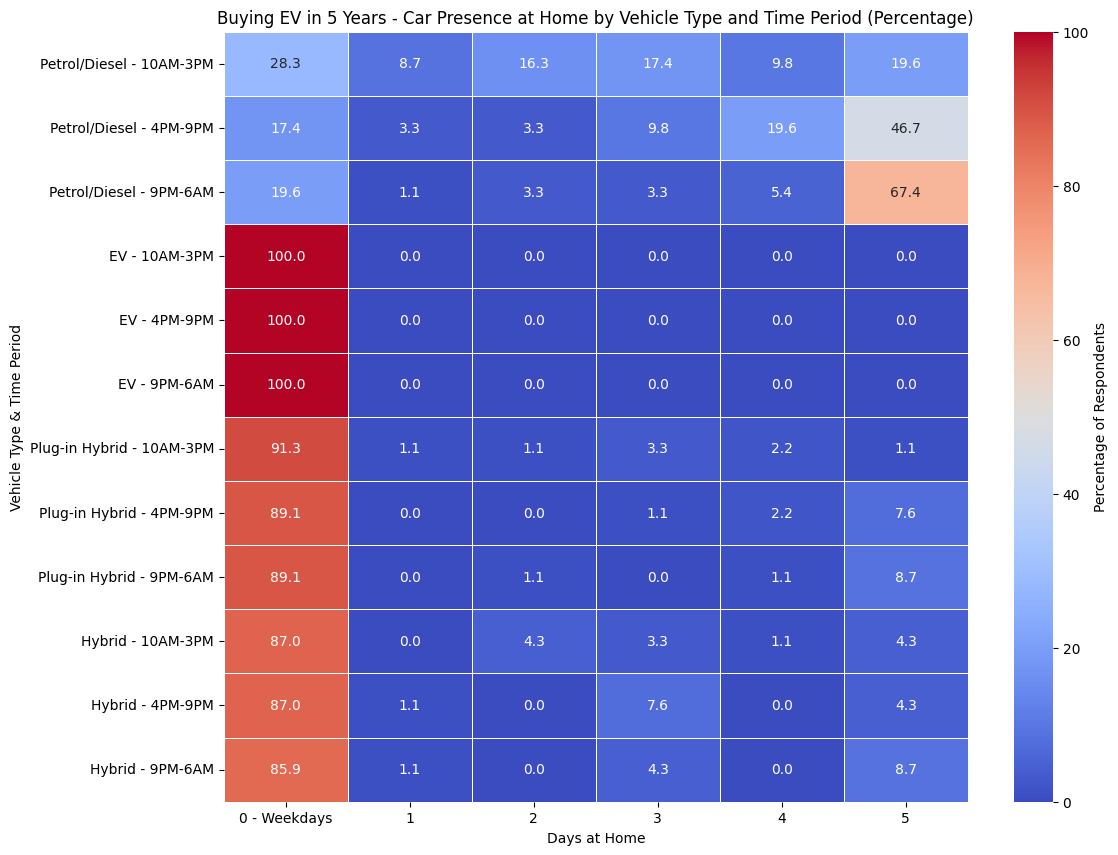

c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors=

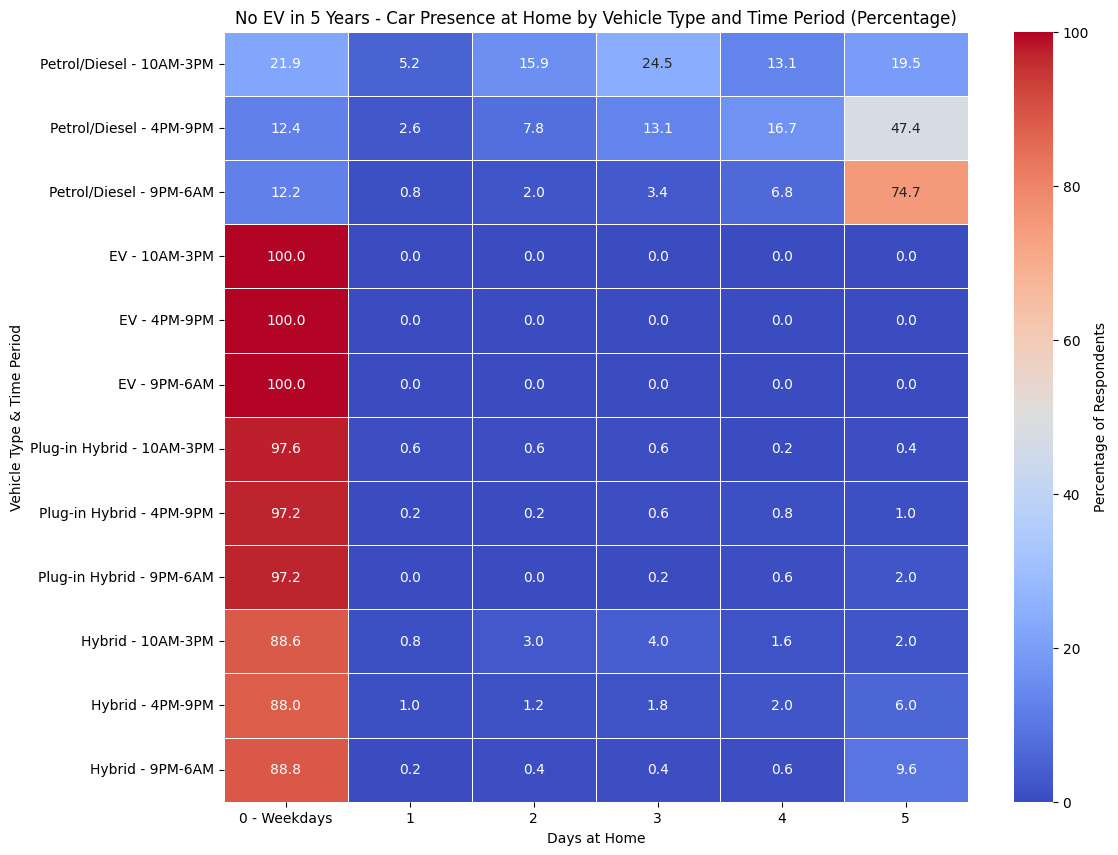

In [30]:
# Define vehicle type column mapping
vehicle_type_columns = {
    "Petrol/Diesel": q6a_petrol,
    "EV": q6a_ev,
    "Plug-in Hybrid": q6a_plughyb,
    "Hybrid": q6a_hybrid
}

# Define time period labels
time_periods = ["10AM-3PM", "4PM-9PM", "9PM-6AM"]

# Run for all segments (displaying percentages)
for df_segment, segment_name in zip([df_ev_owners, df_buying_ev_5_years, df_no_ev_5_years], 
                                    ["EV Owners", "Buying EV in 5 Years", "No EV in 5 Years"]):
    plot_vehicle_presence_percentage_heatmaps(df_segment, vehicle_type_columns, time_periods, "Segment", title_prefix=f"{segment_name} - ")


c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:336: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
c:\Users\24417507\OneDrive - UTS\Documents\v2g-survey-analysis\v2g-survey-analysis\segmentation.py:336: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[vehicle_columns[time_idx]] = df[vehicle_columns[time_idx]].apply(pd.to_numeric, errors=

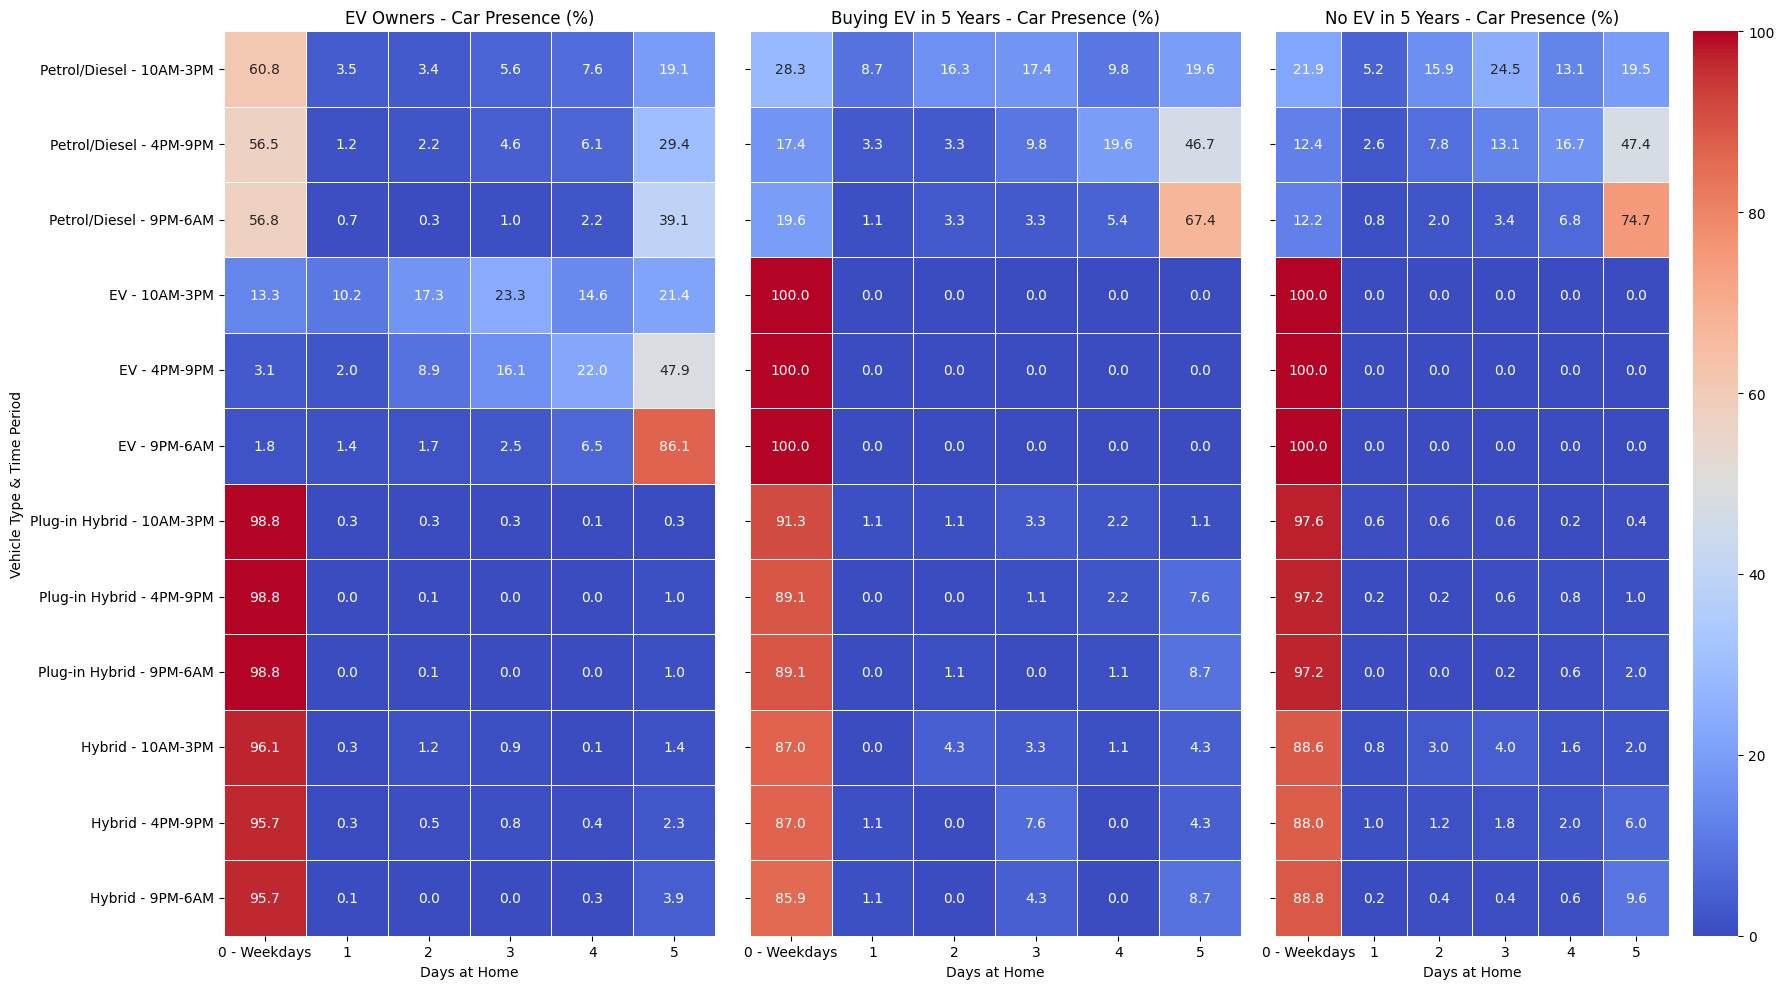

In [31]:
# Define vehicle type column mapping
vehicle_type_columns = {
    "Petrol/Diesel": q6a_petrol,
    "EV": q6a_ev,
    "Plug-in Hybrid": q6a_plughyb,
    "Hybrid": q6a_hybrid
}

# Define time period labels
time_periods = ["10AM-3PM", "4PM-9PM", "9PM-6AM"]

# Run the function to plot side-by-side heatmaps
plot_vehicle_presence_percentage_side_by_side(
    segments=[df_ev_owners, df_buying_ev_5_years, df_no_ev_5_years],
    segment_names=["EV Owners", "Buying EV in 5 Years", "No EV in 5 Years"],
    vehicle_type_columns=vehicle_type_columns,
    time_periods=time_periods
)


## 2.4. Attitude / Motivation

In [32]:
# Define category order for Likert-scale responses
category_order = ["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"]

# Create a combined DataFrame and add a segment identifier
df_ev_owners["Segment"] = "EV Owners"
df_buying_ev_5_years["Segment"] = "Buying EV in 5 Years"
df_no_ev_5_years["Segment"] = "No EV in 5 Years"

df_combined = pd.concat([df_ev_owners, df_buying_ev_5_years, df_no_ev_5_years])

C:\Users\24417507\AppData\Local\Temp\ipykernel_21200\2949735284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev_owners["Segment"] = "EV Owners"
C:\Users\24417507\AppData\Local\Temp\ipykernel_21200\2949735284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buying_ev_5_years["Segment"] = "Buying EV in 5 Years"
C:\Users\24417507\AppData\Local\Temp\ipykernel_21200\2949735284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

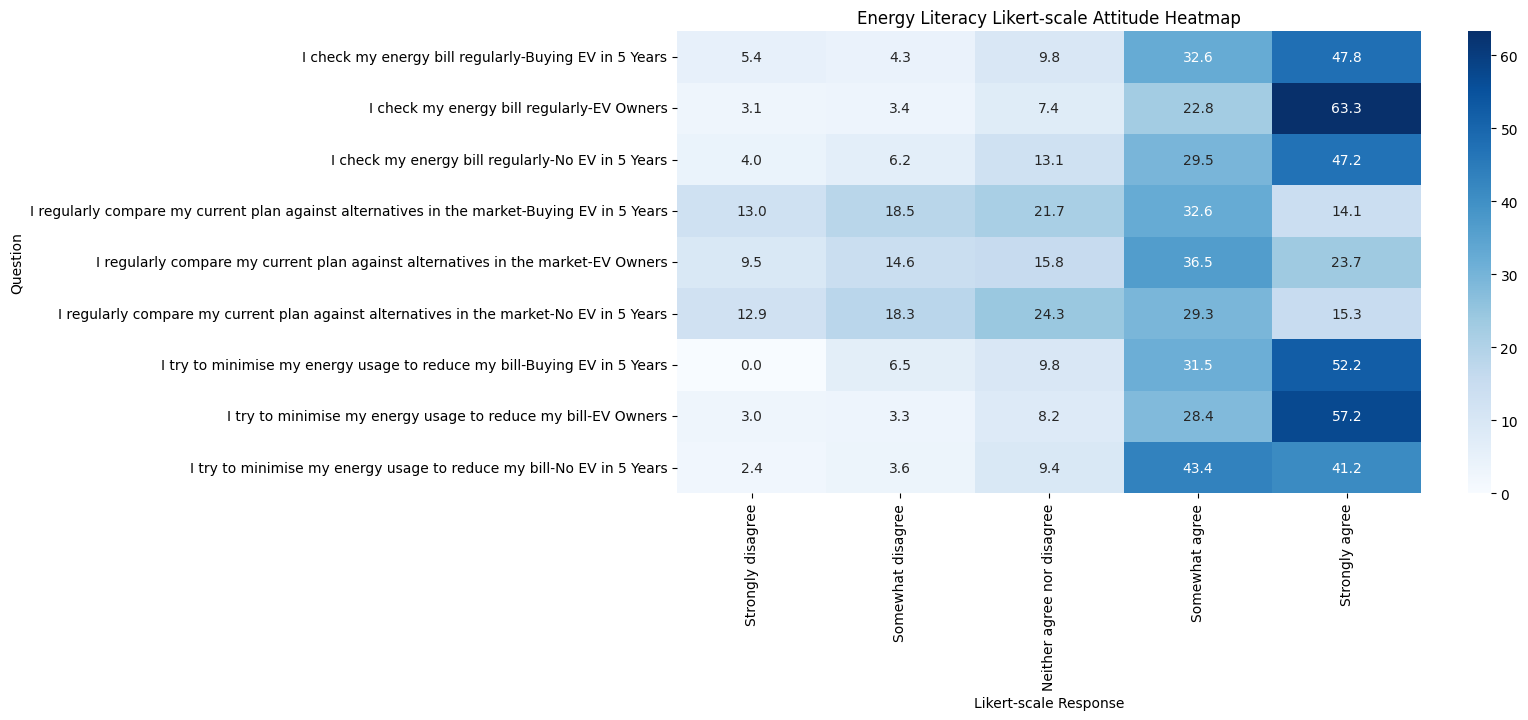

In [33]:
# Run Likert-scale heatmap
plot_likert_heatmap(df_combined, energ_literacy, "Segment", category_order, feature_label_map, title_prefix="Energy Literacy")

In [34]:
print("Available columns:", df_combined.columns)
print("Expected columns:", benefits_v2g)

Available columns: Index(['Q9', 'Q2', 'Q8_1', 'Q8_2', 'Q8_99', 'Q6ax1_1', 'Q6ax1_2', 'Q6ax1_3',
       'Q6ax2_1', 'Q6ax2_2', 'Q6ax2_3', 'Q6ax3_1', 'Q6ax3_2', 'Q6ax3_3',
       'Q6ax4_1', 'Q6ax4_2', 'Q6ax4_3', 'gender', 'colour_plus', 'region',
       'Q20', 'Q21', 'Q22', 'AgeBand', 'Q24', 'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4',
       'Q1_99', 'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_99', 'Q3_1', 'Q3_2',
       'Q3_3', 'Q3_4', 'Q3_5', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5',
       'Q14_6', 'Q14_7', 'Q14_8', 'Q14_99', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4',
       'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_99', 'Q7_1',
       'Q7_2', 'Q7_3', 'Q10_2', 'Segment'],
      dtype='object')
Expected columns: ['Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_99']


In [35]:
df_combined[benefits_v2g] = df_combined[benefits_v2g].apply(pd.to_numeric, errors='coerce')

In [36]:
print(df_combined["Segment"].unique())  # Check if Segment exists


['EV Owners' 'Buying EV in 5 Years' 'No EV in 5 Years']


In [37]:
df_combined[benefits_v2g] = df_combined[benefits_v2g].fillna(0)


In [41]:
# Run Yes/No stacked bar for Benefits of V2G
plot_grouped_bar_chart(df_combined, benefits_v2g, "Segment", feature_label_map, 
                       "Stacked Bar: Yes/No Perceived Benefits of V2G", "Benefits of V2G")

KeyError: (10, 8)

In [ ]:
plot_horizontal_stacked_bar_chart(df_combined, benefits_v2g, "Segment", feature_label_map, 
                                  "Stacked Bar: Yes/No Perceived Benefits of V2G", "Benefits of V2G")

In [ ]:
# Run Co-occurrence heatmap for Benefits of V2G
plot_co_occurrence_heatmap(df_combined, benefits_v2g, "Segment", feature_label_map, title_prefix="V2G Benefits ")

In [ ]:
# Run Co-occurrence heatmap for Concerns of V2G
plot_co_occurrence_heatmap(df_combined, concerns_v2g, "Segment", feature_label_map, title_prefix="V2G Concerns ")


# Scratch

In [ ]:
# 1. Subset only relevant columns
df_subset = df[energ_literacy]

# 2. Melt (unpivot) the data
df_melted = df_subset.melt(var_name='Question', value_name='Answer')

# 3. Convert answers to categorical in the specified order
df_melted['Answer'] = pd.Categorical(
    df_melted['Answer'],
    categories=category_order,
    ordered=True
)

# 4. Replace short codes with descriptive labels
df_melted['Question_label'] = df_melted['Question'].replace(feature_label_map)

# 5. Build crosstab using the new Question_label column
freq_table = pd.crosstab(df_melted['Question_label'], df_melted['Answer'])

# 6. Plot the heatmap (row labels will now show the descriptive text)
plt.figure(figsize=(8, 4))
sns.heatmap(freq_table, annot=True, cmap='Blues', fmt='d')
plt.title('Energy Literacy Questions Heatmap')
plt.ylabel('Question')
plt.xlabel('Likert-scale Response')
plt.show()

In [ ]:
df_subset = df[benefits_v2g].copy()
df_subset = df_subset.replace({"0": 0, "1": 1}).astype(float)

# Calculate %Yes and %No for each column
yes_counts = df_subset.sum()            # number of "1"s per question
no_counts = df_subset.shape[0] - yes_counts  # number of "0"s per question
prop_yes = (yes_counts / df_subset.shape[0]) * 100
prop_no  = (no_counts  / df_subset.shape[0]) * 100

stacked_df = pd.DataFrame({
    "Yes": prop_yes,
    "No": prop_no
})

# Convert question codes to descriptive labels
stacked_df.index = stacked_df.index.to_series().replace(feature_label_map)

# Plot the bars
ax = stacked_df.plot(kind="barh", stacked=True, color=["cornflowerblue", "lightgray"], figsize=(10, 7))

# Move the legend to the top center
ax.legend(
    loc="upper center",        # put the legend on the top center of the axes
    bbox_to_anchor=(0.5, 1.10),# shift the legend box so it's slightly above
    ncol=2                     # show legend items in two columns
)

plt.xlabel("Percentage of respondents")
plt.ylabel("Benefits of V2G")
plt.title("Stacked Bar: Yes/No Perceived Benefits of V2G")
plt.tight_layout()
plt.show()

In [ ]:
df_subset = df[benefits_v2g].replace({"0": 0, "1": 1}).astype(float)

# co-occurrence = sum of the product across rows => how many '1' in both columns
co_occurrence = df_subset.T.dot(df_subset)

# Convert to fraction or keep as raw count
co_occurrence_frac = co_occurrence / df_subset.shape[0] * 100

# Rename rows & columns to descriptive labels
co_occurrence_frac.index = co_occurrence_frac.index.to_series().replace(feature_label_map)
co_occurrence_frac.columns = co_occurrence_frac.columns.to_series().replace(feature_label_map)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_frac, annot=True, cmap="Blues", fmt=".1f")
plt.title("Co-occurrence of V2G Benefits (Percentage of Respondents Selecting Both)")
plt.show()

In [ ]:
df_subset = df[concerns_v2g].copy()
df_subset = df_subset.replace({"0": 0, "1": 1}).astype(float)

# Calculate %Yes and %No for each column
yes_counts = df_subset.sum()            # number of "1"s per question
no_counts = df_subset.shape[0] - yes_counts  # number of "0"s per question
prop_yes = (yes_counts / df_subset.shape[0]) * 100
prop_no  = (no_counts  / df_subset.shape[0]) * 100

stacked_df = pd.DataFrame({
    "Yes": prop_yes,
    "No": prop_no
})

# Convert question codes to descriptive labels
stacked_df.index = stacked_df.index.to_series().replace(feature_label_map)

# Plot the bars
ax = stacked_df.plot(kind="barh", stacked=True, color=["salmon", "lightgray"], figsize=(10, 7))

# Move the legend to the top center
ax.legend(
    loc="upper center",        # put the legend on the top center of the axes
    bbox_to_anchor=(0.5, 1.10),# shift the legend box so it's slightly above
    ncol=2                     # show legend items in two columns
)

plt.xlabel("Percentage of respondents")
plt.ylabel("Benefits of V2G")
plt.title("Stacked Bar: Yes/No Perceived Benefits of V2G")
plt.tight_layout()
plt.show()

In [ ]:
df_subset = df[concerns_v2g].replace({"0": 0, "1": 1}).astype(float)

# co-occurrence = sum of the product across rows => how many '1' in both columns
co_occurrence = df_subset.T.dot(df_subset)

# Convert to fraction or keep as raw count
co_occurrence_frac = co_occurrence / df_subset.shape[0] * 100

# Rename rows & columns to descriptive labels
co_occurrence_frac.index = co_occurrence_frac.index.to_series().replace(feature_label_map)
co_occurrence_frac.columns = co_occurrence_frac.columns.to_series().replace(feature_label_map)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_frac, annot=True, cmap="Oranges", fmt=".1f")
plt.title("Co-occurrence of V2G Benefits (Percentage of Respondents Selecting Both)")
plt.show()